# Data Loading & Pre-Processing

In [12]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [16]:
# Spotify verisini yükleyin
df = pd.read_csv('dataset.csv')

# Seçilen özellikler
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Veriyi ölçeklendirin
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Ölçeklenmiş veriyi DataFrame olarak kaydedin
df_scaled = pd.DataFrame(df_scaled, columns=features)


# Clustering with K-Means

In [17]:
# KMeans ile kümeleme
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_scaled)

# Küme etiketlerini veri çerçevesine ekleyin
df['cluster'] = kmeans.labels_


# Step 3: Visualization with PCA and t-SNE

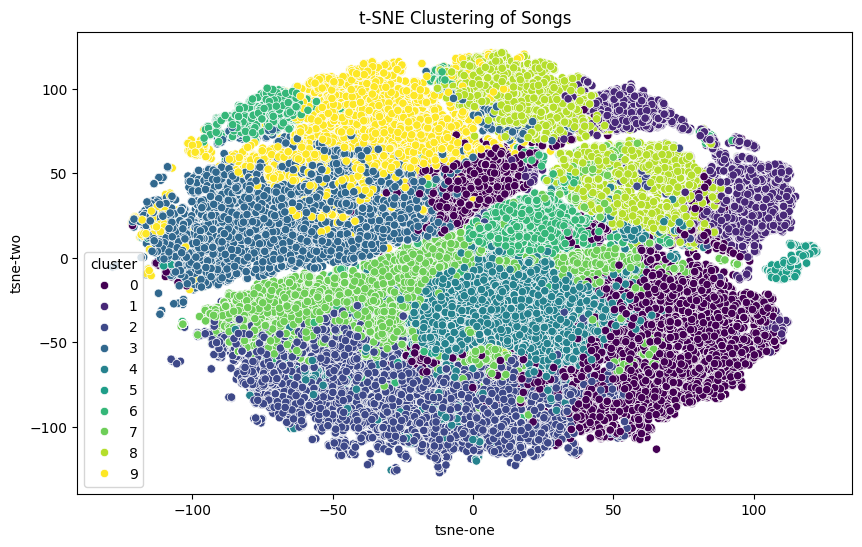

In [18]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

df['tsne-one'] = tsne_result[:, 0]
df['tsne-two'] = tsne_result[:, 1]

# t-SNE plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne-one', y='tsne-two', hue='cluster', palette='viridis', data=df, legend='full')
plt.title('t-SNE Clustering of Songs')
plt.show()


# Step 4: Song Recommendation Function

In [26]:
def recommend_songs(song_id, num_recommendations=5):
    # Get the features of the selected song
    song_features = df_scaled.iloc[song_id].values.reshape(1, -1)

    # Get the cluster label of the selected song
    cluster_label = df.iloc[song_id]['cluster']

    # Filter the songs that are in the same cluster
    cluster_songs = df[df['cluster'] == cluster_label]
    cluster_features = df_scaled[df['cluster'] == cluster_label]

    # Calculate the Euclidean distances between the selected song and other songs in the same cluster
    distances = cdist(song_features, cluster_features, 'euclidean')

    # Find the closest songs (excluding the selected song itself)
    closest_songs = np.argsort(distances)[0][:num_recommendations * 2]  # Fetch more songs to handle duplicates

    # Get the recommended songs and remove duplicates based on 'track_name' and 'artists'
    recommended_songs = cluster_songs.iloc[closest_songs]
    recommended_songs = recommended_songs.drop_duplicates(subset=['track_name', 'artists'])

    # Return the top recommendations, limiting to the desired number of recommendations
    return recommended_songs.head(num_recommendations)

# Example usage: Get recommendations for the song with ID 0
recommended_songs = recommend_songs(0)

# Print the recommended songs with track name and artist information
print(recommended_songs[['track_name', 'artists']])


           track_name                                            artists
0              Comedy                                        Gen Hoshino
88023         JAMAICA                                          Feid;Sech
63905  Bu Aşk Olur Mu                                                MFÖ
60723           空ノムコウ                                          Maharajan
34271     Baari Barsi  Salim–Sulaiman;Harshdeep Kaur;Labh Janjua;Amit...


In [27]:
# Test with a few song IDs
test_song_ids = [10, 50, 100]

for song_id in test_song_ids:
    print(f"\nSong ID: {song_id}")
    recommendations = recommend_songs(song_id)
    print(recommendations[['track_name', 'artists']])



Song ID: 10
                  track_name         artists
462     Give Me Your Forever    Zack Tabudlo
38567     You're My Waterloo  The Libertines
19411             Holy Water  Brett Eldredge
102624        Forget I Exist  Sam MacPherson
19924       Barbed Wire Halo    Aaron Watson

Song ID: 50
                   track_name                        artists
50      Trampoline - Acoustic                  Highland Peak
108169             Nostalgias                Hugo Del Carril
80171      Ennadi Maayavi Nee  Santhosh Narayanan;Sid Sriram
271         Hey There Delilah                   Boyce Avenue
107519             Insecurity                   Jeanne Added

Song ID: 100
               track_name                     artists
63105                Rain               Motohiro Hata
7007             Colorado  The Infamous Stringdusters
99873  Why You No Love Me                  John Mayer
76104   Cuando Me Enamoro              Andrea Bocelli
99958       Lamhe Zaroori                      Neyhal
